In [1]:
import nn as nb
import data as data
import numpy as np
import os
from numpy import asarray


In [2]:
t_data=[]
t_label=[]
te_data=[]
te_label=[]
train_data=[]
train_label=[]
test_data=[]
test_label=[]
g_train=[]
te_grey=[]
grey_test=[]
grey_train=[]
NN = nb.nn()

In [3]:
def loadData():
    os.chdir("flower_photos")
    for root, dirs, files in os.walk(".", topdown = False):
        for name in dirs:
            final_training, final_test_data, test_label, training_label,grey_final_training, grey_final_test_data= data.process(os.path.join(root, name)[2:])
            t_data.extend(final_training)
            t_label.extend(training_label)
            te_data.extend(final_test_data)
            te_label.extend(test_label)
            g_train.extend(grey_final_training)
            te_grey.extend(grey_final_test_data)
            train_label=np.array(t_label)
            train_data=np.array(t_data)
            test_data= np.array(te_data)
            test_label= np.array(te_label)
            grey_train= np.array(g_train)
            grey_test= np.array(te_grey)
            train_data = np.reshape(train_data, (train_data.shape[0], -1))
            train_label= np.reshape(train_label, (train_label.shape[0],-1))
            test_data= np.reshape(test_data,(test_data.shape[0],-1))
            test_label= np.reshape(test_label,(test_label.shape[0],-1))
            grey_train= np.reshape(grey_train,(grey_train.shape[0],-1))
            grey_test= np.reshape(grey_test,(grey_test.shape[0],-1))

    return train_data, train_label,test_data,test_label,grey_train, grey_test


In [4]:
train_data, train_label,test_data,test_label, grey_train, grey_test= loadData()

In [5]:
def myAccuracy(y_acc_test, y_pred):
    num_correct=0
    for i in range(0,634):
        if(y_acc_test[i]==y_pred[i]):
            num_correct+=1
    accuracy = float(num_correct) / 634
    print('Got %d /%d correct => acc: %f' %(num_correct,634,accuracy ))
    return accuracy
def myNestedCrossVal(X,y,foldK,nns,dists,mySeed):
    np.random.seed(mySeed)
    acc_test = [] #list to store acc_testing accuracy
    accuracy_fold = [] #list to store accuracies folds
    we=[]
    listt = ['roses', 'dandelion','daisy', 'tulips','sunflowers']
    shuffled_indices = np.random.permutation(X.shape[0])
    bins = np.array_split(shuffled_indices, foldK)
    assert(foldK==len(bins))
    bestK=[]
    #loop through folds
    for i in range(1,foldK+1):
        print("===========================data for fold no.", i, "==========================")
        foldTrain=[] # list to save current indices for TRAINING,foldTrain
        foldVal=[]   # list to save current indices for VALIDATION,foldVal

        
        for j in range(0,len(bins)):
            if j != i:
                foldTrain.extend(bins[j])
                
        if i+1 > len(bins)-1:    
            foldVal.extend(bins[0])  
        else:
            foldVal.extend(bins[i+1])
                    
        foldTrain = np.setdiff1d(foldTrain, foldVal)  
        foldTrain = foldTrain.tolist()  

        assert not np.intersect1d(foldTrain,foldVal)
        NN.train(X[foldTrain],y[foldTrain])
        bestDistance = '' #save the best distance metric here
        bestNN = -1 #save the best number of neighbours here
        bestAccuracy = -10 #save the best attained accuracy here (in terms of validation)
        for d in range(0,len(dists)):
            for n in range(1,len(nns)+1):
                myPred = NN.predict(X[foldVal], nns[n-1], 'L1') 
                list1 = y[foldVal].tolist()
                a2= (sum(list1, []))
                for item in listt:
                    list1 = myPred.tolist()
                acc = myAccuracy(a2, list1)
                print('K is:' , nns[n-1], 'its accuracy is:', acc)
                acc_test.append(acc)
                
                if np.amax(acc_test) > bestAccuracy:
                    bestAccuracy = np.amax(acc_test)
                    accuracy_fold.append(bestAccuracy)
                    bestDistance = dists[d]
                    bestNN = acc_test.index(np.amax(acc_test)) + 1#index starts at 0 but lists starts at 1 hence + 1
                    bestK.append(bestNN)
        print('========== Best K in this fold is=========', bestNN, ' Best accuracy ',bestAccuracy, "=======================")
             
    return accuracy_fold, acc_test, max(bestK)



In [6]:
accuracy_fold,acc_test,bestK =myNestedCrossVal(train_data,train_label,5,list(range(1,11)) + np.arange(20, 101, 10).tolist(),['L1'],1237)
print(acc_test)
print("===============================================================================")
print(accuracy_fold)
print("==================================BEST K is:=============================================")
print(bestK)

===========================data for fold no. 1 ==========================


D:\anaconda\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


Got 177 /634 correct => acc: 0.279180
K is: 1 its accuracy is: 0.27917981072555204
Got 177 /634 correct => acc: 0.279180
K is: 2 its accuracy is: 0.27917981072555204
Got 190 /634 correct => acc: 0.299685
K is: 3 its accuracy is: 0.2996845425867508
Got 192 /634 correct => acc: 0.302839
K is: 4 its accuracy is: 0.3028391167192429
Got 199 /634 correct => acc: 0.313880
K is: 5 its accuracy is: 0.3138801261829653
Got 201 /634 correct => acc: 0.317035
K is: 6 its accuracy is: 0.31703470031545744
Got 190 /634 correct => acc: 0.299685
K is: 7 its accuracy is: 0.2996845425867508
Got 192 /634 correct => acc: 0.302839
K is: 8 its accuracy is: 0.3028391167192429
Got 189 /634 correct => acc: 0.298107
K is: 9 its accuracy is: 0.2981072555205047
Got 199 /634 correct => acc: 0.313880
K is: 10 its accuracy is: 0.3138801261829653
Got 194 /634 correct => acc: 0.305994
K is: 20 its accuracy is: 0.305993690851735
Got 191 /634 correct => acc: 0.301262
K is: 30 its accuracy is: 0.30126182965299686
Got 197 /6

Got 178 /634 correct => acc: 0.280757
K is: 70 its accuracy is: 0.2807570977917981
Got 176 /634 correct => acc: 0.277603
K is: 80 its accuracy is: 0.277602523659306
Got 174 /634 correct => acc: 0.274448
K is: 90 its accuracy is: 0.2744479495268139
Got 170 /634 correct => acc: 0.268139
K is: 100 its accuracy is: 0.26813880126182965
========== Best K in this fold is========= 23  Best accuracy  0.34858044164037855 =======================
[0.27917981072555204, 0.27917981072555204, 0.2996845425867508, 0.3028391167192429, 0.3138801261829653, 0.31703470031545744, 0.2996845425867508, 0.3028391167192429, 0.2981072555205047, 0.3138801261829653, 0.305993690851735, 0.30126182965299686, 0.3107255520504732, 0.2996845425867508, 0.2902208201892745, 0.2996845425867508, 0.2949526813880126, 0.2886435331230284, 0.27917981072555204, 0.2854889589905363, 0.2854889589905363, 0.3312302839116719, 0.34858044164037855, 0.334384858044164, 0.3391167192429022, 0.3438485804416404, 0.3470031545741325, 0.33753943217665

In [7]:
import numpy as np
def getM_std():
    acc_list= [[0.27917981072555204,0.2854889589905363,0.28391167192429023,0.2854889589905363,0.2917981072555205], 
     [0.27917981072555204,0.2854889589905363,0.28391167192429023,0.2854889589905363,0.2917981072555205],  
     [0.2996845425867508, 0.3312302839116719,0.27917981072555204,0.2870662460567823,0.2823343848580442], 
     [0.3028391167192429, 0.34858044164037855, 0.2807570977917981,0.2949526813880126,0.2886435331230284],  
     [0.3138801261829653, 0.334384858044164,0.27287066246056785,0.2902208201892745,0.2949526813880126], 
     [0.31703470031545744, 0.3391167192429022, 0.27917981072555204,0.30441640378548895,0.3028391167192429],  
     [0.2917981072555205, 0.27602523659305994, 0.2886435331230284,0.3438485804416404,0.2996845425867508 ], 
     [0.2902208201892745, 0.3470031545741325, 0.2917981072555205, 0.2823343848580442,0.2902208201892745 ],  
     [0.28391167192429023, 0.2854889589905363,0.2917981072555205,0.33753943217665616,0.2981072555205047], 
     [0.27129337539432175, 0.277602523659306, 0.29652996845425866,0.3186119873817035,0.3138801261829653],  
     [0.27129337539432175, 0.27917981072555204,0.2886435331230284,0.3249211356466877,0.305993690851735], 
     [0.27287066246056785, 0.2807570977917981, 0.27917981072555204,0.3312302839116719,0.30126182965299686],  
     [0.28391167192429023, 0.2807570977917981,0.27129337539432175,0.3249211356466877,0.3107255520504732], 
     [0.2854889589905363, 0.277602523659306, 0.2744479495268139,0.3280757097791798,0.2996845425867508],  
     [0.2823343848580442, 0.27917981072555204,0.27602523659305994,0.31703470031545744,0.2902208201892745], 
     [0.2807570977917981, 0.2870662460567823, 0.27287066246056785,0.3249211356466877,0.2996845425867508],  
     [0.277602523659306, 0.2744479495268139,0.27129337539432175,0.30914826498422715,0.2949526813880126], 
     [0.2744479495268139,  0.27287066246056785, 0.27287066246056785,0.305993690851735, 0.2886435331230284],  
     [0.26813880126182965, 0.277602523659306,0.2618296529968454,0.30441640378548895,0.27917981072555204]] 
    
    acc_mean= []
    acc_std=[]
    acc_mean.extend(np.mean(acc_list, axis=1))
    acc_std.extend(np.std(acc_list, axis=1))
    
    return acc_mean,acc_std




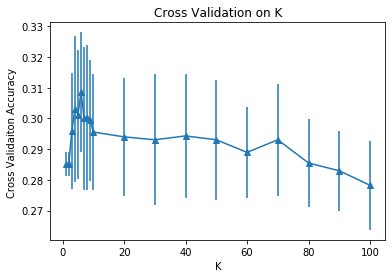

In [8]:
import matplotlib.pyplot as plt
K= list(range(1,11)) + np.arange(20, 101, 10).tolist()
acc_mean, acc_std = getM_std()
plt.title("Cross Validation on K")
plt.ylabel("Cross Validaiton Accuracy ")
plt.xlabel("K")
plt.errorbar(K, acc_mean, acc_std,marker='^')
plt.show()



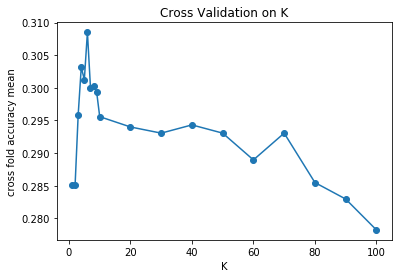

In [9]:
import data as data
import numpy as np
K= list(range(1,11)) + np.arange(20, 101, 10).tolist()
acc_mean, acc_std = getM_std()
plt.title("Cross Validation on K")
plt.xlabel("K")
plt.ylabel("cross fold accuracy mean")
plt.plot( K ,acc_mean, '-o')
plt.show()


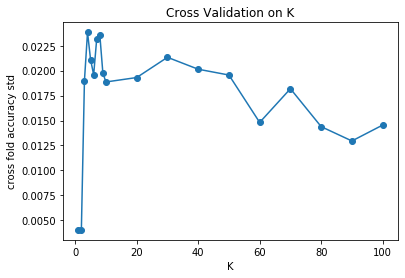

In [10]:
import data as data
import numpy as np
K= list(range(1,11)) + np.arange(20, 101, 10).tolist()
acc_mean, acc_std = getM_std()
plt.title("Cross Validation on K")
plt.xlabel("K")
plt.ylabel("cross fold accuracy std")
plt.plot( K ,acc_std, '-o')
plt.show()


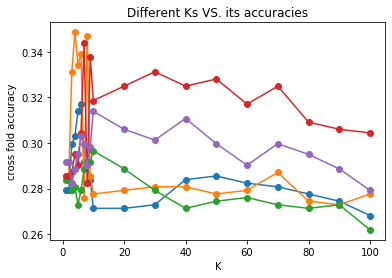

In [12]:
import numpy as np
import data as data
acc_list= [[0.27917981072555204,0.2854889589905363,0.28391167192429023,0.2854889589905363,0.2917981072555205], 
 [0.27917981072555204,0.2854889589905363,0.28391167192429023,0.2854889589905363,0.2917981072555205],  
 [0.2996845425867508, 0.3312302839116719,0.27917981072555204,0.2870662460567823,0.2823343848580442], 
 [0.3028391167192429, 0.34858044164037855, 0.2807570977917981,0.2949526813880126,0.2886435331230284],  
 [0.3138801261829653, 0.334384858044164,0.27287066246056785,0.2902208201892745,0.2949526813880126], 
 [0.31703470031545744, 0.3391167192429022, 0.27917981072555204,0.30441640378548895,0.3028391167192429],  
 [0.2917981072555205, 0.27602523659305994, 0.2886435331230284,0.3438485804416404,0.2996845425867508 ], 
 [0.2902208201892745, 0.3470031545741325, 0.2917981072555205, 0.2823343848580442,0.2902208201892745 ],  
 [0.28391167192429023, 0.2854889589905363,0.2917981072555205,0.33753943217665616,0.2981072555205047], 
 [0.27129337539432175, 0.277602523659306, 0.29652996845425866,0.3186119873817035,0.3138801261829653],  
 [0.27129337539432175, 0.27917981072555204,0.2886435331230284,0.3249211356466877,0.305993690851735], 
 [0.27287066246056785, 0.2807570977917981, 0.27917981072555204,0.3312302839116719,0.30126182965299686],  
 [0.28391167192429023, 0.2807570977917981,0.27129337539432175,0.3249211356466877,0.3107255520504732], 
 [0.2854889589905363, 0.277602523659306, 0.2744479495268139,0.3280757097791798,0.2996845425867508],  
 [0.2823343848580442, 0.27917981072555204,0.27602523659305994,0.31703470031545744,0.2902208201892745], 
 [0.2807570977917981, 0.2870662460567823, 0.27287066246056785,0.3249211356466877,0.2996845425867508],  
 [0.277602523659306, 0.2744479495268139,0.27129337539432175,0.30914826498422715,0.2949526813880126], 
 [0.2744479495268139,  0.27287066246056785, 0.27287066246056785,0.305993690851735, 0.2886435331230284],  
 [0.26813880126182965, 0.277602523659306,0.2618296529968454,0.30441640378548895,0.27917981072555204]] 
K= list(range(1,11)) + np.arange(20, 101, 10).tolist()
plt.title("Different Ks VS. its accuracies")
plt.xlabel("K")
plt.ylabel("cross fold accuracy")
plt.plot( K ,acc_list, '-o')
plt.show()
